In [1]:
import numpy as mp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
X= dataset[['Annual Income (k$)',
       'Spending Score (1-100)']]

In [5]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distances')

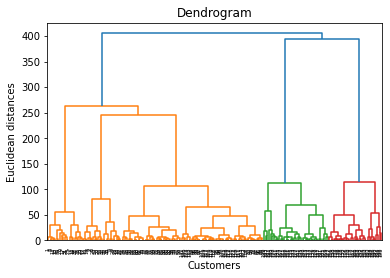

In [10]:
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [14]:
y_hc=hc.fit_predict(X)

In [15]:
ser = pd.Series(y_hc,name='prediction')

In [16]:
ser

0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    0
197    2
198    0
199    2
Name: prediction, Length: 200, dtype: int64

In [19]:
final = pd.concat([X,ser],axis=1)

In [20]:
final

,Annual Income (k$),Spending Score (1-100),prediction
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

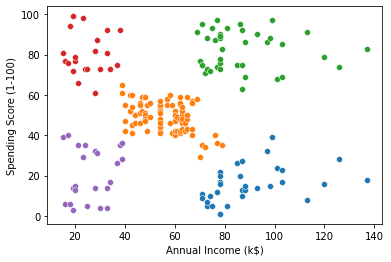

In [24]:
k=final[final['prediction']==0]
sns.scatterplot(x=k['Annual Income (k$)'],y=k['Spending Score (1-100)'])
l=final[final['prediction']==1]
sns.scatterplot(x=l['Annual Income (k$)'],y=l['Spending Score (1-100)'])
m=final[final['prediction']==2]
sns.scatterplot(x=m['Annual Income (k$)'],y=m['Spending Score (1-100)'])
n=final[final['prediction']==3]
sns.scatterplot(x=n['Annual Income (k$)'],y=n['Spending Score (1-100)'])
o=final[final['prediction']==4]
sns.scatterplot(x=o['Annual Income (k$)'],y=o['Spending Score (1-100)'])